# Script for classification of Breast Cancer Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


## 1. Load the data

In [2]:
data = pd.read_csv("Breast_Cancer.csv",header=0)

In [3]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


## 2.0 Remove Columns Unamed and Id

In [4]:
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)


## 2.1 Binarize the output column: Diagnosis. Plot the counts for each class: Benign & Malignant

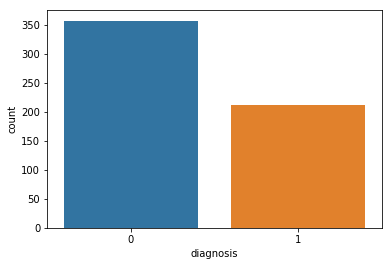

In [5]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
Output = data['diagnosis']
sns.countplot(data['diagnosis'],label="Count")


In [6]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## 2.2 Remove the diagnosis column from the dataset, so dataset only consists of predictors.

In [7]:
data.drop("diagnosis",axis=1,inplace=True)
    

## 2.3 Descriptive statistics of the dataset

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 2.4 Correlation Plot of predictors

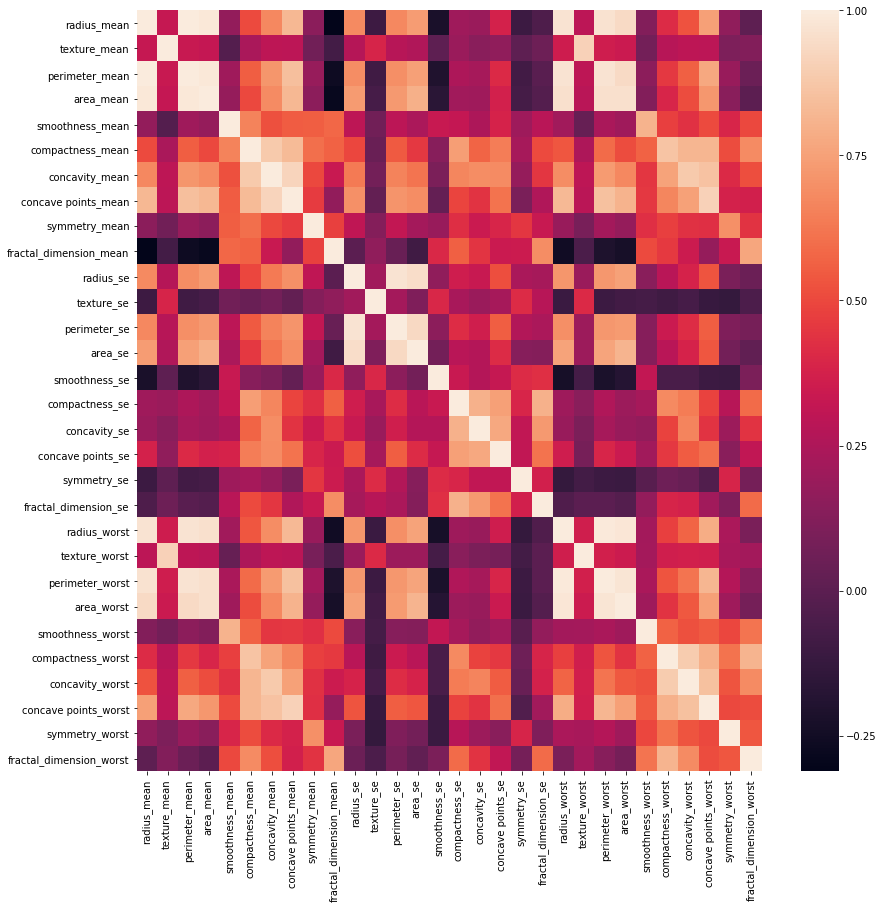

In [9]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr());

## 2.5 Split the data into training and test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,Output,test_size=0.25, random_state=2)


In [11]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


## 2.6 Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 3.0 Model Building and Tuning

## 3.1 Logistic Regression Classifier

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
model_logit= LogisticRegression(solver='liblinear',random_state=2)
model_logit.fit(X_train,Y_train)
prediction_logit_train=model_logit.predict(X_train)


### 3.1.1 Training Set Confusion Matrix and Accuracy

In [14]:
confusion_matrix(Y_train, prediction_logit_train)


array([[268,   2],
       [  4, 152]], dtype=int64)

In [15]:
metrics.accuracy_score(prediction_logit_train,Y_train)


0.9859154929577465

### 3.1.2 K- Fold Cross Validation 

In [16]:
from sklearn.model_selection import cross_val_score
accu_logit=cross_val_score(estimator=model_logit,X=X_train,y=Y_train,cv=10)
print(accu_logit.mean())
print(accu_logit.std())

0.9765227021040974
0.0234804318934553


## 3.1.3 Parameter Tuning : Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV
parameters_logit= [{'C':[0.1,0.2,0.5],'solver':['liblinear'],'penalty':['l1','l2'],'max_iter':[1000]},
                   {'C':[0.1,0.2,0.5,1],'solver':['lbfgs'],'penalty':['l2'],'max_iter':[1000]}]
grid_search_logit=GridSearchCV(estimator=model_logit, param_grid=parameters_logit,scoring='accuracy',cv=10)

In [18]:
grid_search_logit.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 0.2, 0.5], 'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'max_iter': [1000]}, {'C': [0.1, 0.2, 0.5, 1], 'solver': ['lbfgs'], 'penalty': ['l2'], 'max_iter': [1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
grid_search_logit.best_score_

0.9835680751173709

In [20]:
grid_search_logit.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

### 3.1.4 Testing Set Confusion Matrix and Accuracy

In [21]:
prediction_logit=model_logit.predict(X_test)
confusion_matrix(Y_test, prediction_logit)


array([[84,  3],
       [ 1, 55]], dtype=int64)

In [22]:
metrics.accuracy_score(prediction_logit,Y_test)


0.972027972027972

In [23]:
prediction_logit_tuned=grid_search_logit.predict(X_test)
metrics.accuracy_score(prediction_logit_tuned,Y_test)



0.986013986013986

## 3.2 K- Nearest Neighbor Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, Y_train)
prediction_knn_train=model_knn.predict(X_train)


### 3.2.1 Training Set Confusion Matrix and Accuracy

In [25]:
confusion_matrix(Y_train, prediction_knn_train)


array([[268,   2],
       [  9, 147]], dtype=int64)

In [26]:
metrics.accuracy_score(prediction_knn_train,Y_train)

0.9741784037558685

### 3.2.2 K-Fold Cross Validation

In [27]:
accu_knn=cross_val_score(estimator=model_knn,X=X_train,y=Y_train,cv=10)
print(accu_knn.mean())
print(accu_knn.std())

0.9599667774086379
0.02587437042142615


### 3.2.3 Grid Search

In [28]:
parameters_knn= [{'n_neighbors':[3,5,7,9,11],'metric':['euclidean','manhattan','chebyshev'],
                  'weights':['uniform','distance']}]
grid_search_knn=GridSearchCV(estimator=model_knn, param_grid=parameters_knn,scoring='accuracy',cv=10)

In [29]:
grid_search_knn.fit(X_train,Y_train)

C:\Users\adi44\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan', 'chebyshev'], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
grid_search_knn.best_score_

0.9671361502347418

In [31]:
grid_search_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

### 3.2.4 Testing Set Confusion matrix and Accuracy

In [32]:
prediction_knn=model_knn.predict(X_test)
confusion_matrix(Y_test, prediction_knn)

array([[87,  0],
       [ 4, 52]], dtype=int64)

In [33]:
metrics.accuracy_score(prediction_knn,Y_test)

0.972027972027972

In [34]:
prediction_knn_tuned=grid_search_knn.predict(X_test)
metrics.accuracy_score(prediction_knn_tuned,Y_test) # Same accuracy but different results refer to line 35,36

0.972027972027972

In [35]:
np.array_equal(prediction_knn_tuned,prediction_knn)

False

In [36]:
confusion_matrix(Y_test, prediction_knn_tuned)

array([[86,  1],
       [ 3, 53]], dtype=int64)

## 3.3 Support Vector Classifier

In [37]:
from sklearn.svm import SVC
model_svm = SVC(C = 100, gamma = 0.01,kernel='linear')
model_svm.fit(X_train, Y_train)
prediction_svm_train=model_svm.predict(X_train)


### 3.3.1 Training Set Confusion Matrix and Accuracy

In [38]:
confusion_matrix(Y_train, prediction_svm_train)

array([[270,   0],
       [  0, 156]], dtype=int64)

In [39]:
metrics.accuracy_score(prediction_svm_train,Y_train)

1.0

### 3.3.2 K-Fold Cross Validation

In [40]:
accu_svm=cross_val_score(estimator=model_svm,X=X_train,y=Y_train,cv=10)
print(accu_svm.mean())
print(accu_svm.std())

0.9484496124031008
0.027107420074002294


### 3.3.3 Parameter Tuning - Grid Search 

In [41]:
parameters_svm= [{'C':[1,10,100,1000],'kernel':['linear']},
                 {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.001]}]
grid_search_svm=GridSearchCV(estimator=model_svm, param_grid=parameters_svm,scoring='accuracy',cv=10)

In [42]:
grid_search_svm=grid_search_svm.fit(X_train,Y_train)

C:\Users\adi44\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
grid_search_svm.best_score_

0.9835680751173709

In [44]:
grid_search_svm.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

### 3.3.4 Testing Set Confusion Matrix and Accuracy

In [45]:
prediction_svm=model_svm.predict(X_test)
confusion_matrix(Y_test, prediction_svm)

array([[77, 10],
       [ 2, 54]], dtype=int64)

In [46]:
metrics.accuracy_score(prediction_svm,Y_test)

0.916083916083916

In [47]:
prediction_svm_tuned=grid_search_svm.predict(X_test)
metrics.accuracy_score(prediction_svm_tuned,Y_test)

0.965034965034965

## 3.4 Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
prediction_dt_train=model_dt.predict(X_train)


### 3.4.1 Training Set Confusion Matrix and Accuracy

In [49]:
confusion_matrix(Y_train, prediction_dt_train)

array([[270,   0],
       [  0, 156]], dtype=int64)

In [50]:
metrics.accuracy_score(prediction_dt_train,Y_train)

1.0

### 3.4.2  K-Fold Cross Validation

In [51]:
accu_dt=cross_val_score(estimator=model_dt,X=X_train,y=Y_train,cv=10)
print(accu_dt.mean())
print(accu_dt.std())

0.9295681063122924
0.056152731799014324


### 3.4.3 Grid Search

In [52]:
min_max_split_var= range(10,500,20)
max_depth_var= range(1,20,2)
parameters_dt=[{'min_samples_split':min_max_split_var,'max_depth': max_depth_var}]
grid_search_dt=GridSearchCV(estimator=model_dt, param_grid=parameters_dt,scoring='accuracy',cv=10)



In [53]:
grid_search_dt.fit(X_train,Y_train)

C:\Users\adi44\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [54]:
grid_search_dt.best_score_

0.9342723004694836

In [55]:
grid_search_dt.best_params_

{'max_depth': 5, 'min_samples_split': 10}

### 3.4.4 Testing Set Confusion Matrix and Accuracy 

In [56]:
prediction_dt=model_dt.predict(X_test)
confusion_matrix(Y_test, prediction_dt)

array([[78,  9],
       [ 3, 53]], dtype=int64)

In [57]:
metrics.accuracy_score(prediction_dt,Y_test)

0.916083916083916

In [58]:
prediction_dt_tuned=grid_search_dt.predict(X_test)
metrics.accuracy_score(prediction_dt_tuned,Y_test)

0.9370629370629371

## 3.5 Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, Y_train)
prediction_rf_train=model_rf.predict(X_train)


### 3.5.1 Training Set Confusion Matrix and Accuracy

In [60]:
confusion_matrix(Y_train, prediction_rf_train)

array([[270,   0],
       [  0, 156]], dtype=int64)

In [61]:
metrics.accuracy_score(prediction_rf_train,Y_train)

1.0

### 3.5.2 K-Fold Cross Validation

In [62]:
accu_rf=cross_val_score(estimator=model_rf,X=X_train,y=Y_train,cv=10)
print(accu_rf.mean())
print(accu_rf.std())

0.9599667774086379
0.0393757791258307


### 3.5.3 Grid Search 

In [63]:
parameters_rf= [{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                 'n_estimators': [90,100,110,200]}]

grid_search_rf=GridSearchCV(estimator=model_rf, param_grid=parameters_rf,scoring='accuracy',cv=10)

In [64]:
grid_search_rf.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'n_estimators': [90, 100, 110, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [65]:
grid_search_rf.best_score_

0.9671361502347418

In [66]:
grid_search_rf.best_params_

{'max_depth': 40, 'n_estimators': 90}

### 3.5.3 Testing Set Confusion Matrix and Accuracy

In [67]:
prediction_rf=model_rf.predict(X_test)
confusion_matrix(Y_test, prediction_rf)

array([[83,  4],
       [ 4, 52]], dtype=int64)

In [68]:
metrics.accuracy_score(prediction_rf,Y_test)

0.9440559440559441

In [69]:
prediction_rf_tuned=grid_search_rf.predict(X_test)
metrics.accuracy_score(prediction_rf_tuned,Y_test)

0.9440559440559441

## 4.0 ROC Plot

In [70]:
def plot_ROC( label,pred ):
    from sklearn.metrics import roc_curve
    fpr, tpr,t = roc_curve( label,pred )
    plt.plot(fpr, tpr, label='ROC curve', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ')
    print( 'the threshold is ', t )
    plt.show()

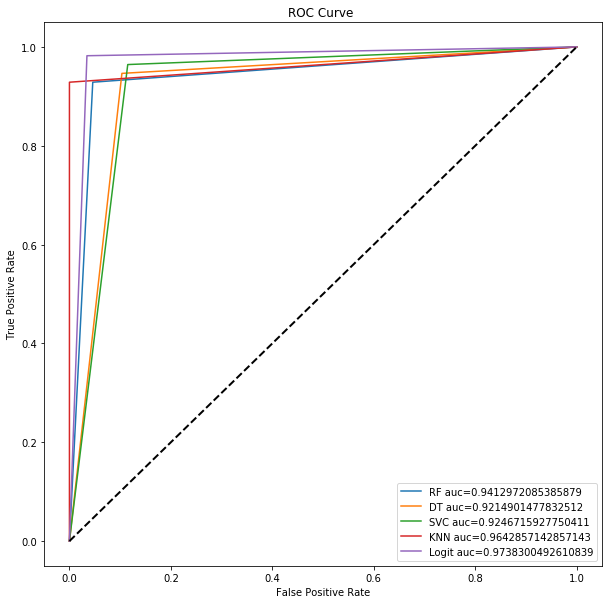

In [71]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(Y_test,prediction_rf)
fpr_dt, tpr_dt, _ = metrics.roc_curve(Y_test,prediction_dt)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Y_test,prediction_svm)
fpr_knn, tpr_knn, _ = metrics.roc_curve(Y_test,prediction_knn)
fpr_logit, tpr_logit, _ = metrics.roc_curve(Y_test,prediction_logit)



auc_rf = metrics.roc_auc_score(Y_test, prediction_rf)
auc_dt = metrics.roc_auc_score(Y_test, prediction_dt)
auc_svc = metrics.roc_auc_score(Y_test, prediction_svm)
auc_knn = metrics.roc_auc_score(Y_test, prediction_knn)
auc_logit = metrics.roc_auc_score(Y_test, prediction_logit)

plt.figure(figsize=(10,10))

plt.plot(fpr_rf,tpr_rf,label="RF auc="+str(auc_rf))
plt.plot(fpr_dt,tpr_dt,label="DT auc="+str(auc_dt))
plt.plot(fpr_svc, tpr_svc,label="SVC auc="+str(auc_svc))
plt.plot(fpr_knn, tpr_knn,label="KNN auc="+str(auc_knn))
plt.plot(fpr_logit, tpr_logit,label="Logit auc="+str(auc_logit))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')

plt.legend(loc=4)
plt.show()

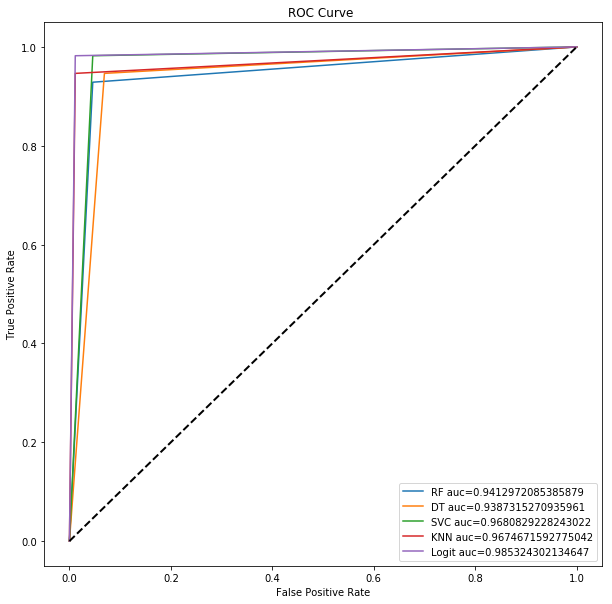

In [72]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(Y_test,prediction_rf_tuned)
fpr_dt, tpr_dt, _ = metrics.roc_curve(Y_test,prediction_dt_tuned)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Y_test,prediction_svm_tuned)
fpr_knn, tpr_knn, _ = metrics.roc_curve(Y_test,prediction_knn_tuned)
fpr_logit, tpr_logit, _ = metrics.roc_curve(Y_test,prediction_logit_tuned)



auc_rf = metrics.roc_auc_score(Y_test, prediction_rf_tuned)
auc_dt = metrics.roc_auc_score(Y_test, prediction_dt_tuned)
auc_svc = metrics.roc_auc_score(Y_test, prediction_svm_tuned)
auc_knn = metrics.roc_auc_score(Y_test, prediction_knn_tuned)
auc_logit = metrics.roc_auc_score(Y_test, prediction_logit_tuned)

plt.figure(figsize=(10,10))

plt.plot(fpr_rf,tpr_rf,label="RF auc="+str(auc_rf))
plt.plot(fpr_dt,tpr_dt,label="DT auc="+str(auc_dt))
plt.plot(fpr_svc, tpr_svc,label="SVC auc="+str(auc_svc))
plt.plot(fpr_knn, tpr_knn,label="KNN auc="+str(auc_knn))
plt.plot(fpr_logit, tpr_logit,label="Logit auc="+str(auc_logit))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')

plt.legend(loc=4)
plt.show()